보스톤 데이터로 주택가격(medv) 예측하기

출처: https://m.blog.naver.com/da0097/222402665297

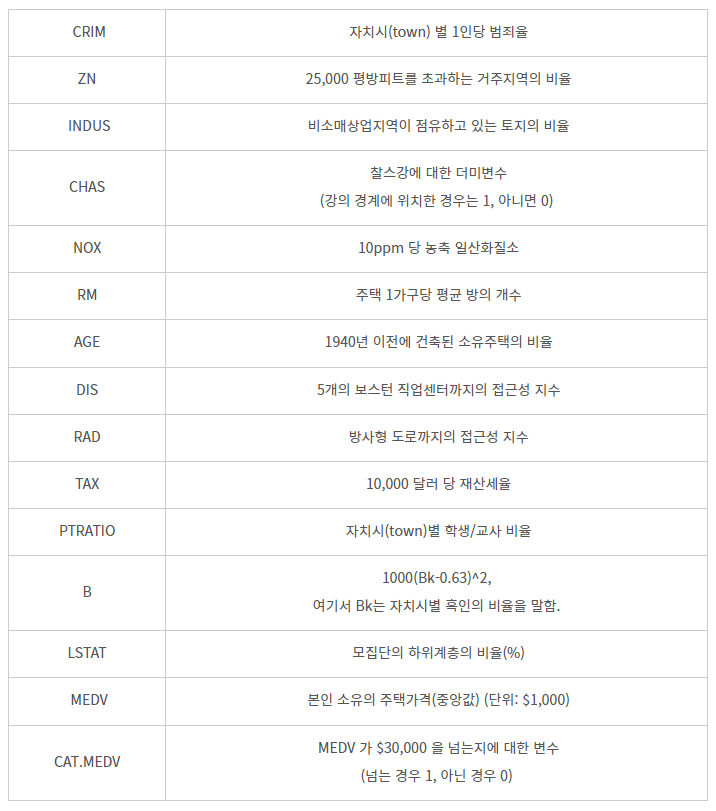


In [51]:
import pandas as pd
boston = pd.read_csv('./boston.csv')
print(boston.head())
#print(type(boston))

#print(boston.dtypes)
#print(boston.isnull().sum())

# 피어슨 상관계수
corr = boston.corr()
#print(corr)
#print(pd.DataFrame(boston.corr()['medv']).sort_values('medv', ascending=False))

# 트레이닝 셋 나누기
x = boston.iloc[:,:-1]
y = boston['medv']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=99)

# 스케일링
from sklearn.preprocessing import RobustScaler
sc = RobustScaler()
sc.fit(x_train)
x_train_sc = sc.transform(x_train)
x_test_sc = sc.transform(x_test)

from sklearn.model_selection import cross_val_score
#from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

# DT
print("DT", cross_val_score(DecisionTreeRegressor(), x_train, y_train, cv=3).mean())

# RF
print("RF", cross_val_score(RandomForestRegressor(), x_train, y_train, cv=3).mean())

# XGB
print("XGB", cross_val_score(XGBRegressor(objective ='reg:squarederror'), x_train, y_train, cv=3).mean())

# KNN
print("KNN", cross_val_score(KNeighborsRegressor(), x_train_sc, y_train, cv=3).mean())

# 모델 생성
model = XGBRegressor(objective ='reg:squarederror')
model.fit(x_train, y_train)
predict = model.predict(x_test)

output=pd.DataFrame({'index': x_test.index, 'predict':predict})
print(output)

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
DT 0.6726190533800556
RF 0.8482446538930789
XGB 0.8667457837145808
KNN 0.7505561721835107
     index    predict
0      281  35.809246
1      273  39.626839
2      251  29.692118
3      329  24.592209
4       40  34.524902
..     ...        ...
97     265  23.454889
98      72  23.984192
99     306  34.413715
100    484  20.549603
101    324  23.499117

[102 rows x 2 

In [52]:
# 참고
# from sklearn.metrics import mean_squared_error
# print(mean_squared_error(y_train, model.predict(x_train)))
# print(mean_squared_error(y_test, predict))